In [25]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [26]:
import os
fileList = os.listdir("/content/")
fileList

['.config',
 'TCEHY.csv',
 'NFLX.csv',
 'MSFT.csv',
 'NVDA.csv',
 'MSFT_output.csv',
 'TSLA.csv',
 'GOOG_output.csv',
 'AAPL_output.csv',
 'AMZN_output.csv',
 'AMZN.csv',
 'BIDU.csv',
 'TSLA_output.csv',
 'GOOG.csv',
 'NFLX_output.csv',
 'BIDU_output.csv',
 'AAPL.csv',
 'INTC.csv',
 'NVDA_output.csv',
 'INTC_output.csv',
 'TCEHY_output.csv',
 'sample_data']

In [27]:
#companyName != "" and companyName !="sample_data"
companyList = []
for file in fileList:
    companyName = file.split(".")[0]
    if  companyName != "" and companyName !="sample_data":
        companyList.append(companyName)
print(companyList)

['TCEHY', 'NFLX', 'MSFT', 'NVDA', 'MSFT_output', 'TSLA', 'GOOG_output', 'AAPL_output', 'AMZN_output', 'AMZN', 'BIDU', 'TSLA_output', 'GOOG', 'NFLX_output', 'BIDU_output', 'AAPL', 'INTC', 'NVDA_output', 'INTC_output', 'TCEHY_output']


In [28]:
import pandas as pd
# First, we get the data
stockList = ['AMZN', 'NVDA','AAPL','BIDU','GOOG','INTC','MSFT','NFLX','TCEHY','TSLA']
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("/content/" + i + ".csv", index_col = 'Date')

In [29]:
from sklearn.model_selection import train_test_split
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    # train / test split
    df_new[i]["Train"] = df_[i].query('Date <=  "2019-03-13"').reset_index(drop = False)
    df_new[i]["Test"]  = df_[i].query('Date >= "2019-03-13"').reset_index(drop = False)

In [30]:
for i in stockList:
  df_new[i]["Train"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)
  df_new[i]["Test"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)

In [31]:
df_new[i]["Train"]

,Date,Close
0,2012-01-03,1.872000
1,2012-01-04,1.847333
2,2012-01-05,1.808000
3,2012-01-06,1.794000
4,2012-01-09,1.816667
...,...,...
1804,2019-03-07,18.439333
1805,2019-03-08,18.942667
1806,2019-03-11,19.394667
1807,2019-03-12,18.890667


In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"]['Close'])
    a1 = np.array(df_new[i]["Test"]['Close'])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

del a0
del a1

In [33]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")
for i in transform_test.keys():
    print(i, transform_test[i].shape)

AMZN (1809, 1)
NVDA (1809, 1)
AAPL (1809, 1)
BIDU (1809, 1)
GOOG (1809, 1)
INTC (1809, 1)
MSFT (1809, 1)
NFLX (1809, 1)
TCEHY (1809, 1)
TSLA (1809, 1)


AMZN (453, 1)
NVDA (453, 1)
AAPL (453, 1)
BIDU (453, 1)
GOOG (453, 1)
INTC (453, 1)
MSFT (453, 1)
NFLX (453, 1)
TCEHY (453, 1)
TSLA (453, 1)


In [34]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(10,1809):
        X_train.append(transform_train[j][i-10:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train

    testset[j] = {}
    X_test = []
    y_test = []
    for i in range(10, 453):
        X_test.append(transform_test[j][i-10:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [35]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
AMZN,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
NVDA,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
AAPL,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
BIDU,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
GOOG,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
INTC,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
MSFT,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
NFLX,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
TCEHY,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
TSLA,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"


In [36]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from keras.layers import Input, Dense, LSTM, Conv1D, Dropout, Bidirectional, Multiply
from keras.models import Model
# from attention_utils import get_activations
from keras.layers import *
from keras.layers import LSTM
from keras.models import *
import numpy as np
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(1234)
from keras import backend as K
from keras.layers import InputLayer
from keras.optimizers import Adam
from keras import layers
from keras.models import Model
from keras.layers import Flatten
import sqlite3
from datetime import datetime
from numpy.random import seed

In [37]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):

    # Normalization and Attention
    # "EMBEDDING LAYER"
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # "ATTENTION LAYER"
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # FEED FORWARD Part - you can stick anything here or just delete the whole section - it will still work.
    return x + res

In [38]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x) #this is a pass-through
    return keras.Model(inputs, outputs)

In [39]:
time_steps = 10
input_shape=(time_steps,1)
model = build_model(
    input_shape,
    head_size=46, # Embedding size for attention
    num_heads=60, # Number of attention heads
    ff_dim=55, # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks = 1,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 1)]              0         []                            
                                                                                                  
 layer_normalization_2 (Lay  (None, 10, 1)                2         ['input_2[0][0]']             
 erNormalization)                                                                                 
                                                                                                  
 multi_head_attention_1 (Mu  (None, 10, 1)                19321     ['layer_normalization_2[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_2[0][0]
                                                                    ']                      

In [40]:
for i in stockList:
    print("Fitting to", i)
    history = model.fit(trainset[i]["X"], trainset[i]["y"], epochs=100, batch_size=20, validation_split=0.2)

Fitting to AMZN
Epoch 1/100
72/72 [==============================] - 5s 46ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 2/100
72/72 [==============================] - 4s 52ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3/100
72/72 [==============================] - 4s 57ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/100
72/72 [==============================] - 3s 41ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
72/72 [==============================] - 3s 38ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/100
72/72 [==============================] - 3s 47ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/100


In [46]:
from tensorflow.keras.models import Model

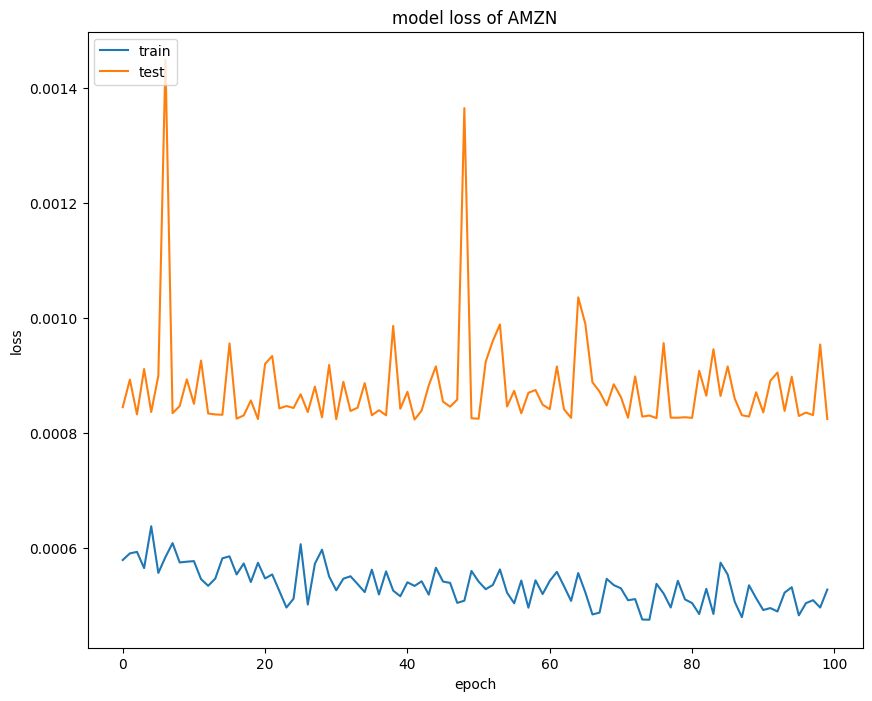

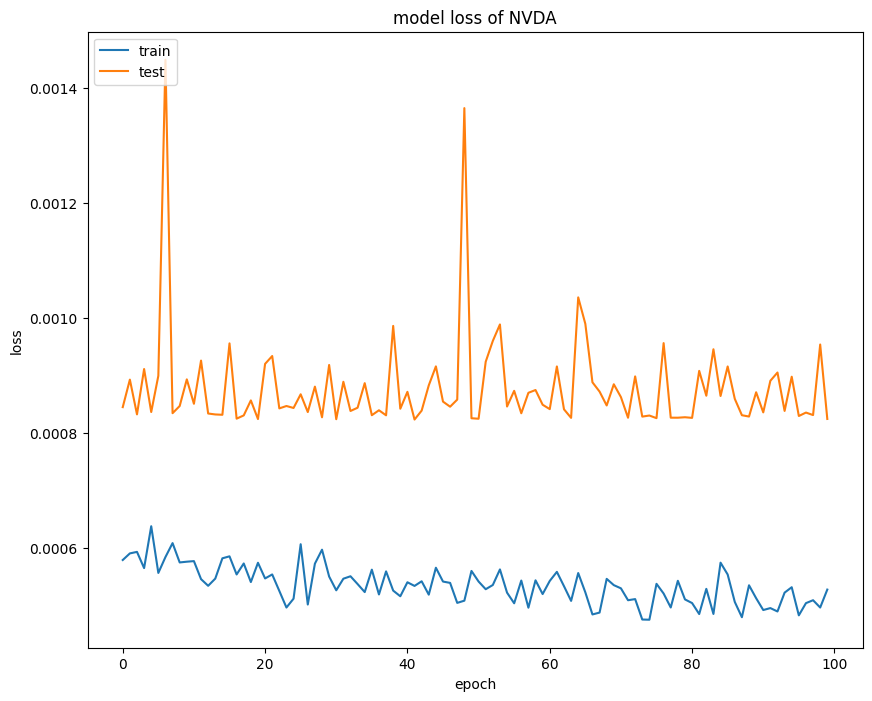

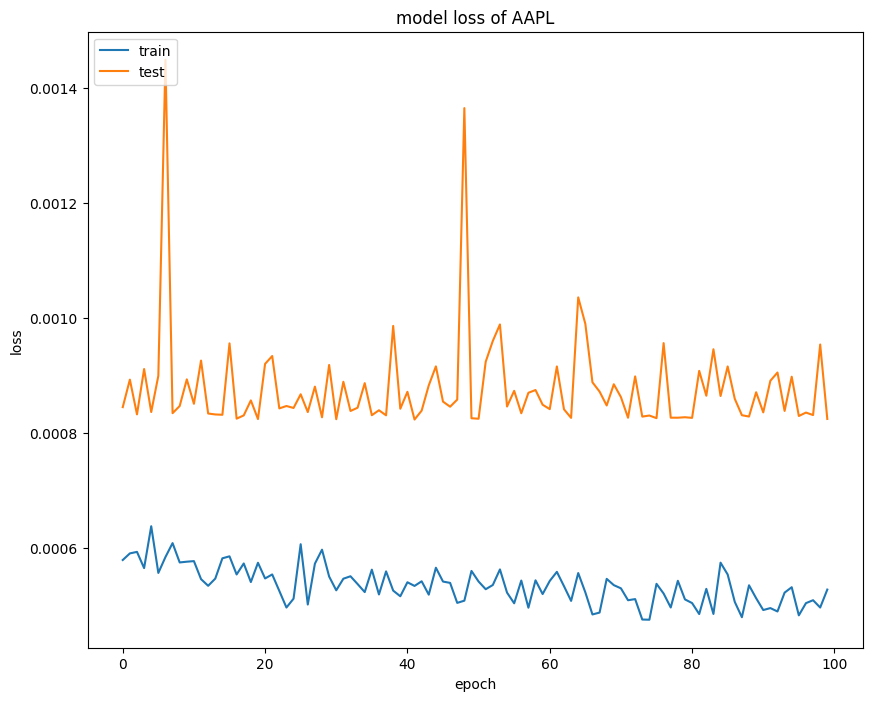

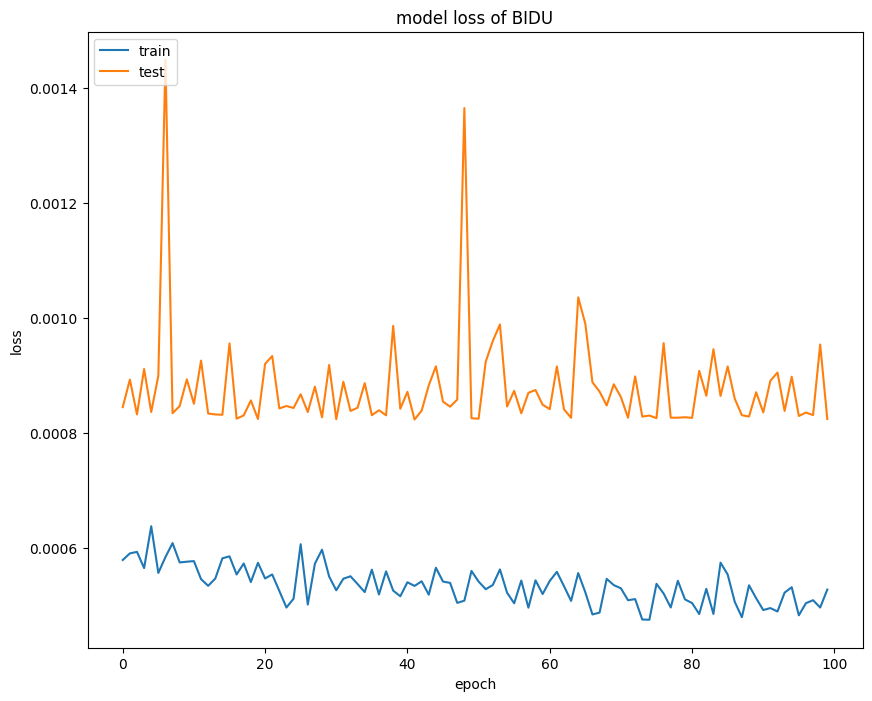

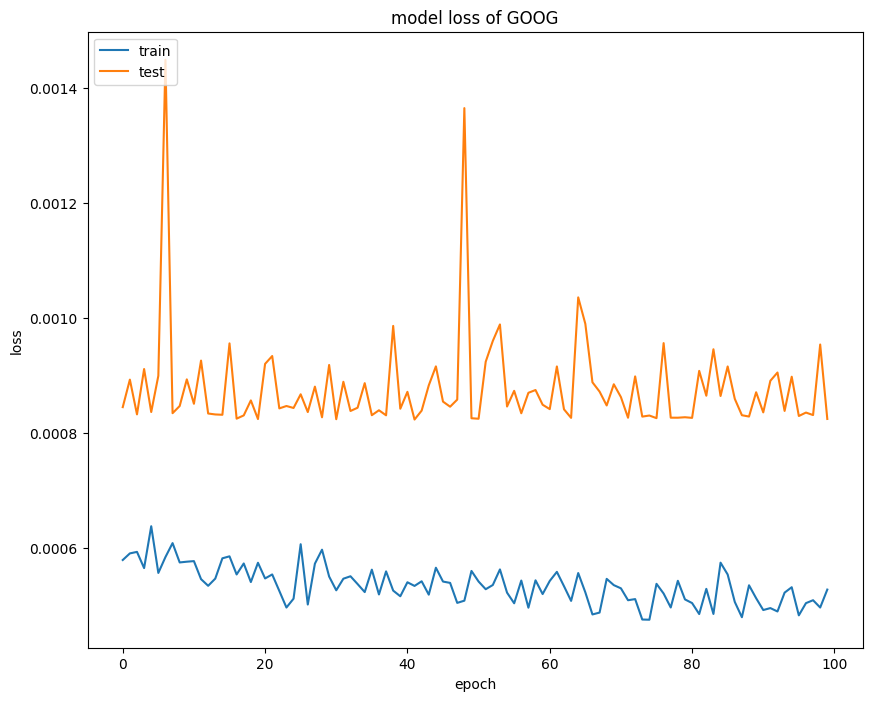

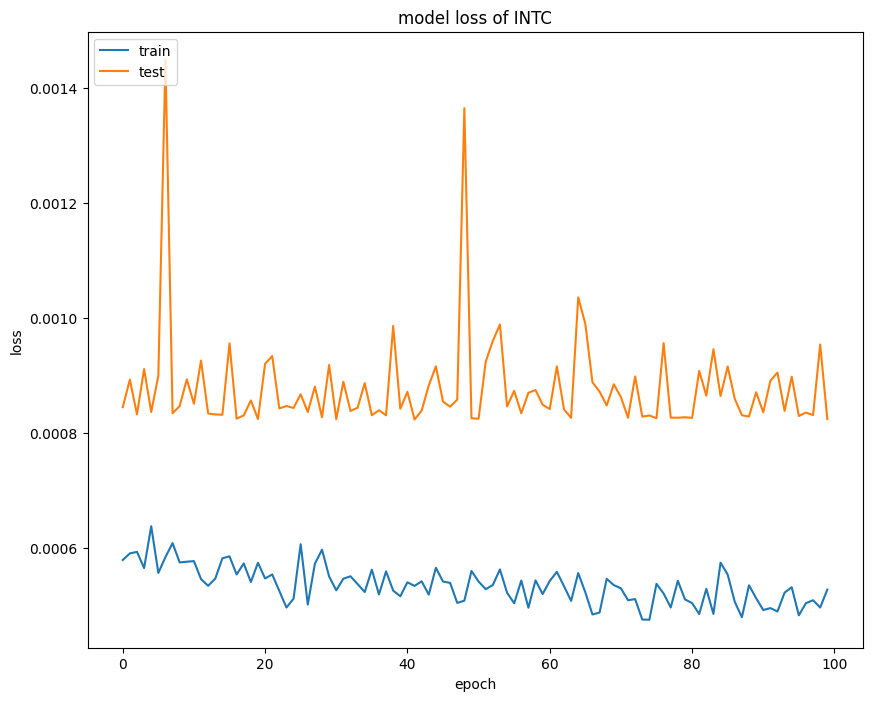

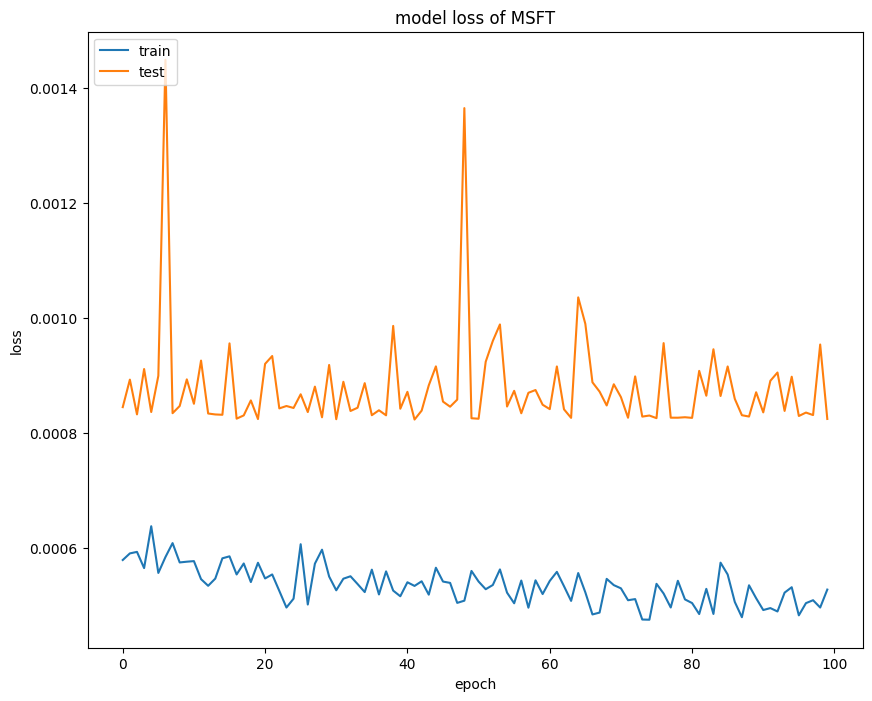

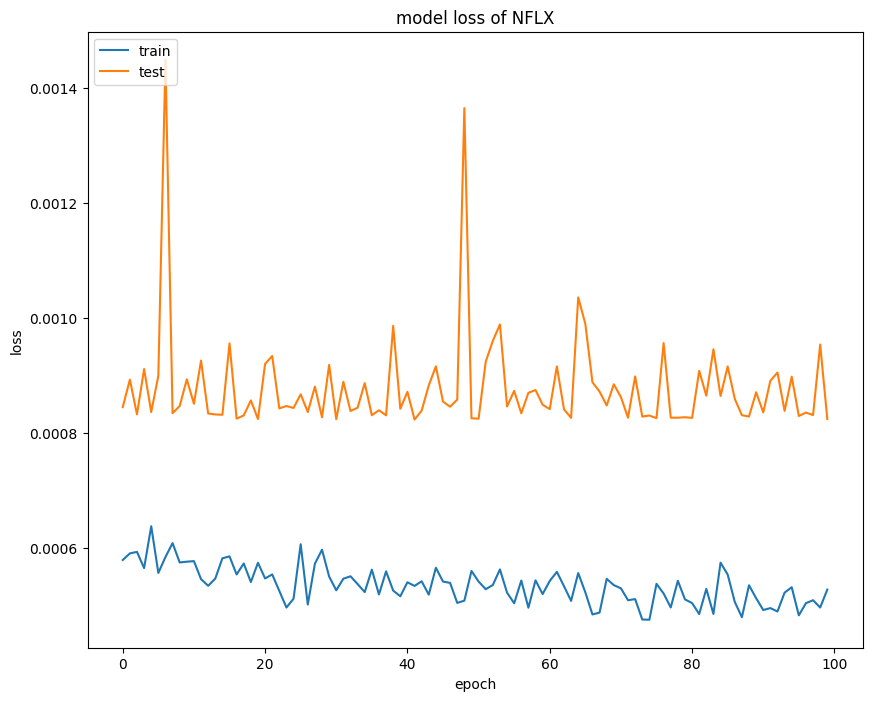

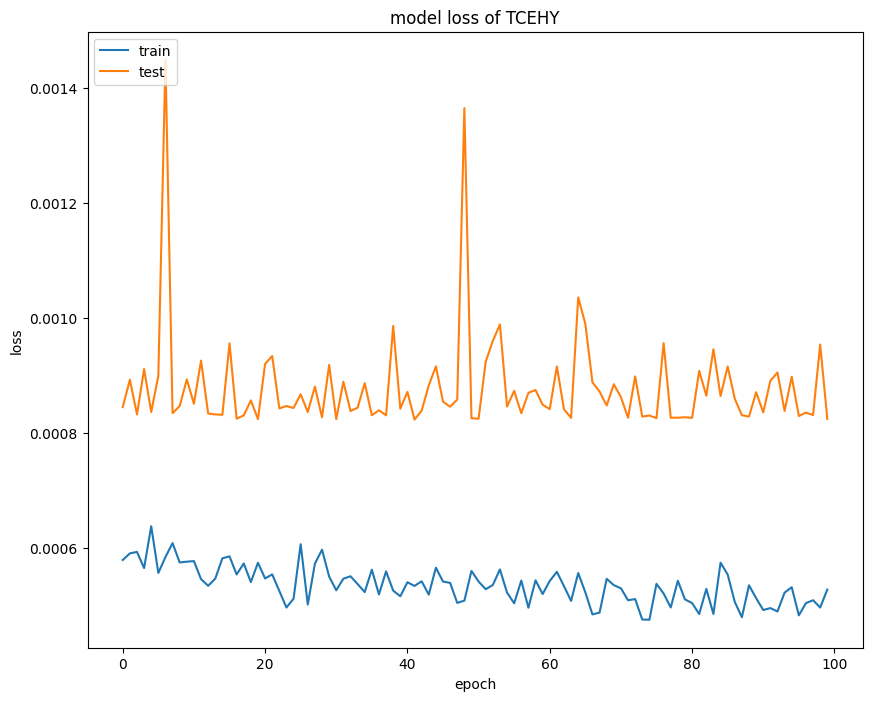

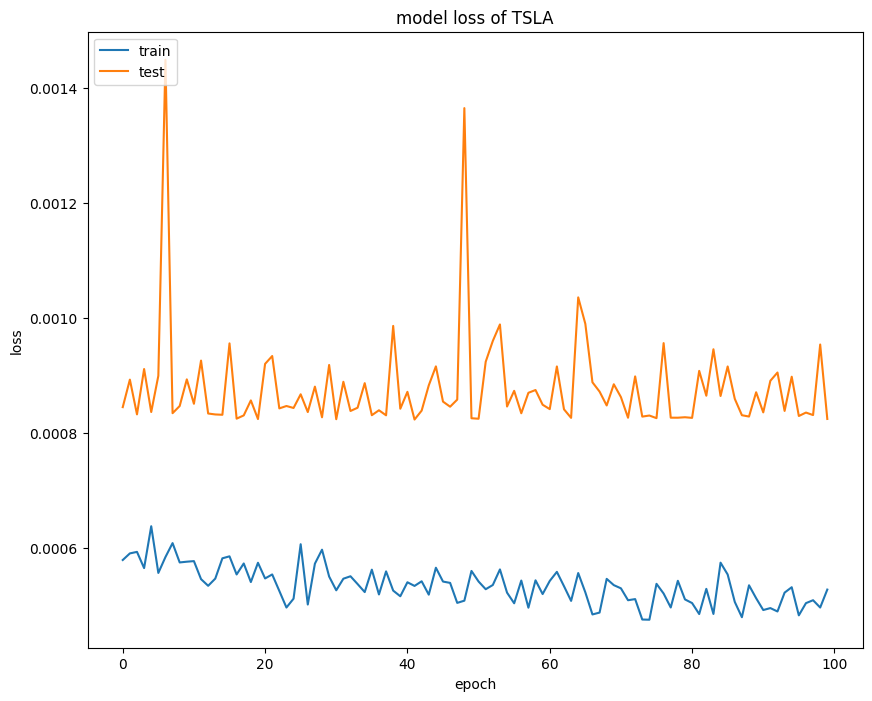

In [47]:
for i in stockList:
  plt.rcParams['figure.figsize'] = (10,8)
  plt.plot(history.history['loss']) # tb
  plt.plot(history.history['val_loss'])
  plt.title('model loss of ' + i)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

14/14 [==============================] - 0s 32ms/step


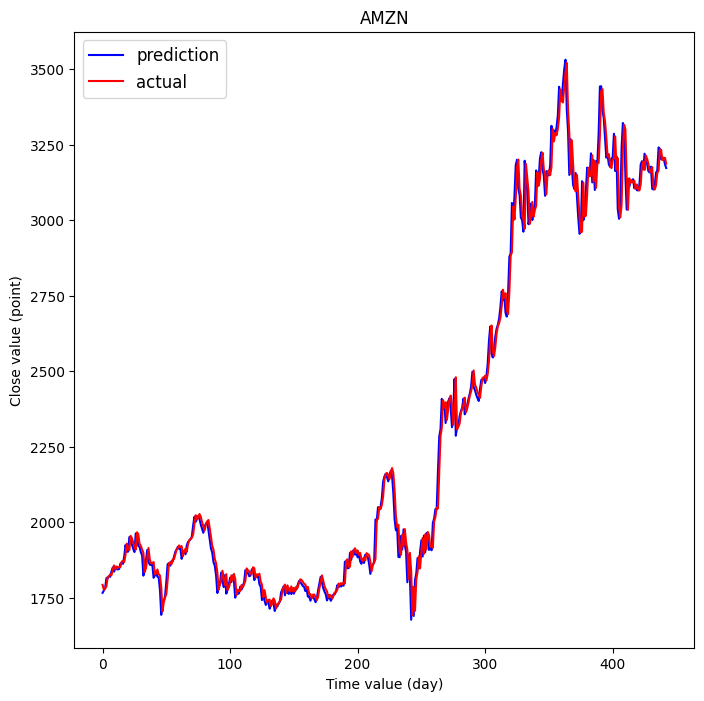

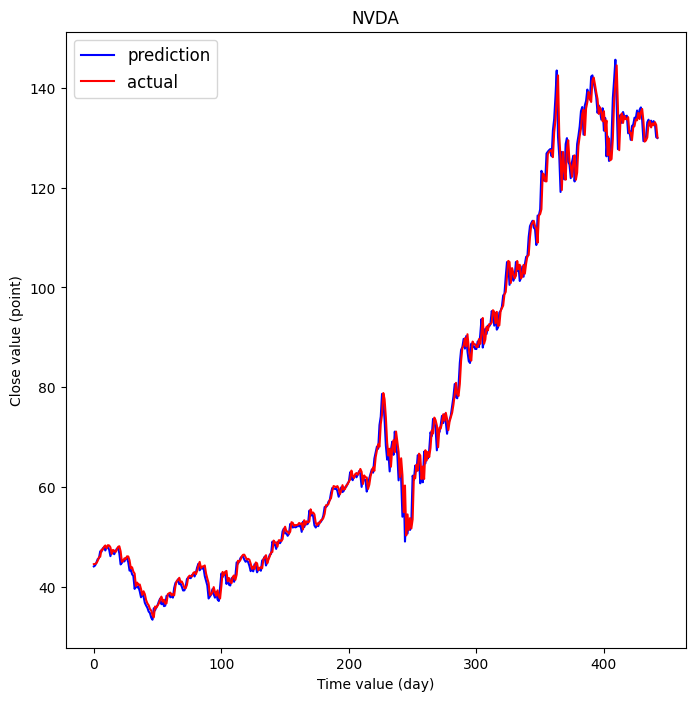

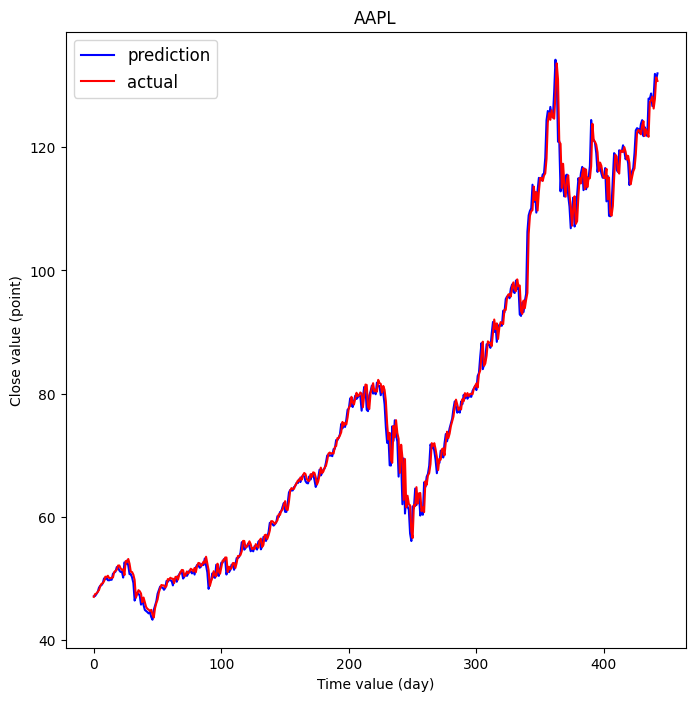

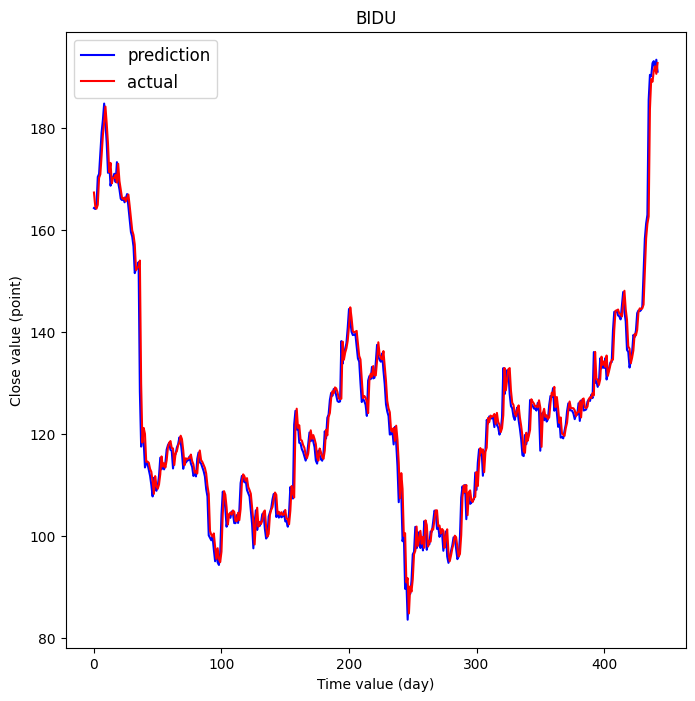

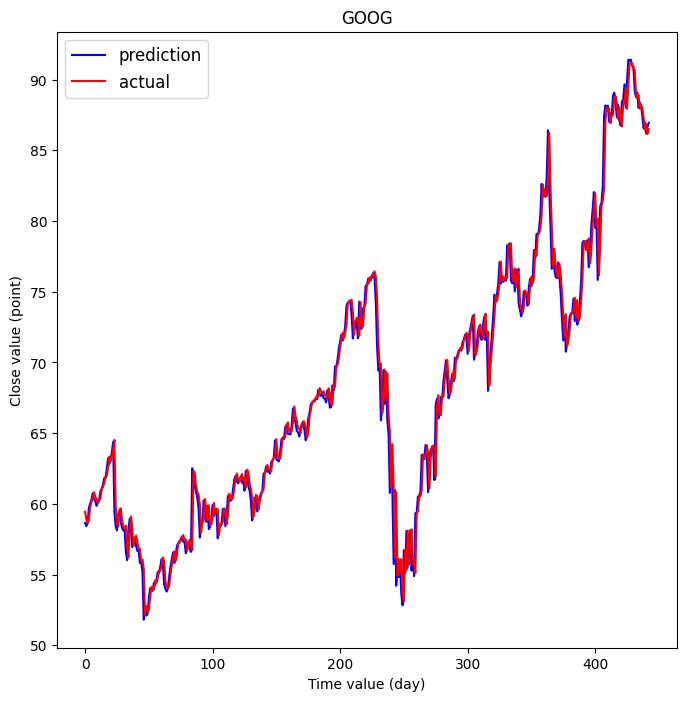

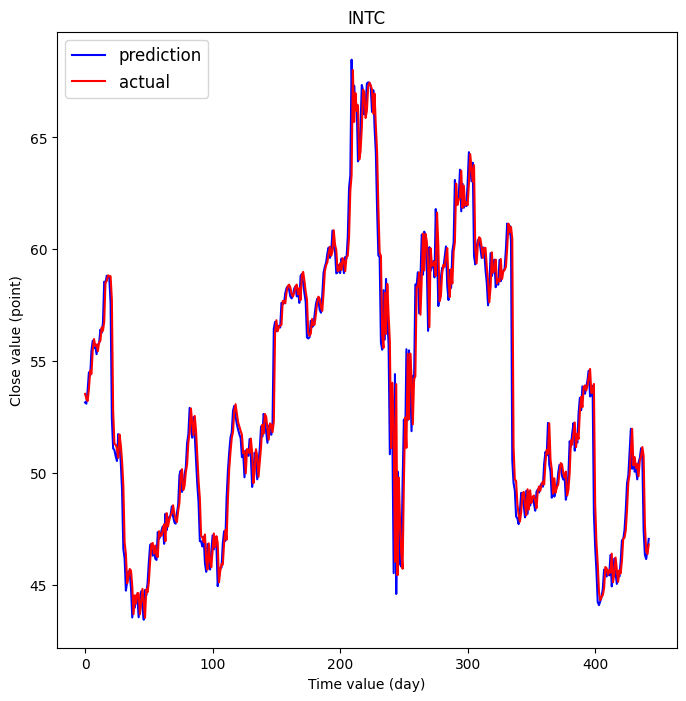

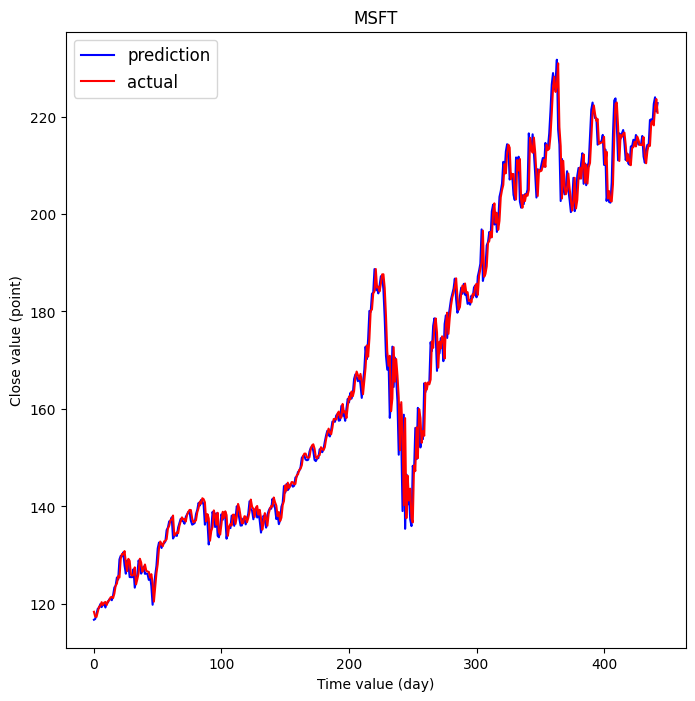

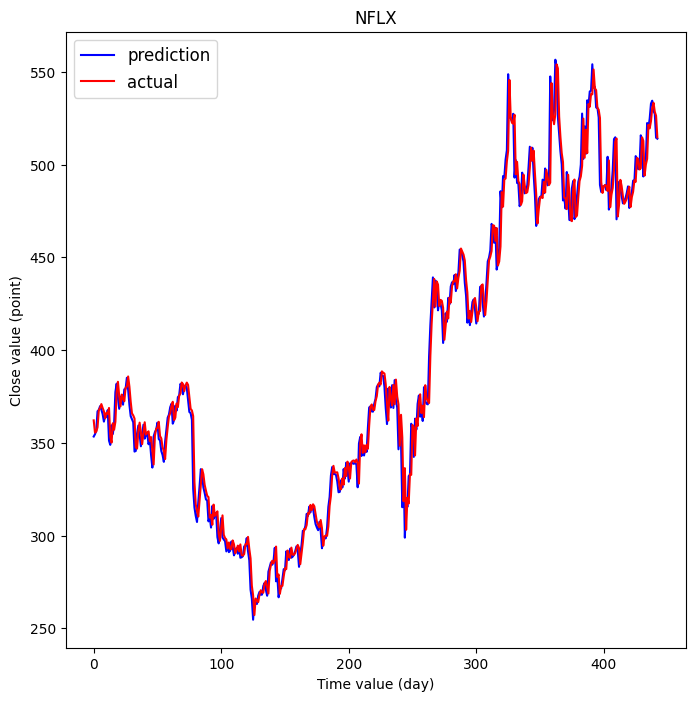

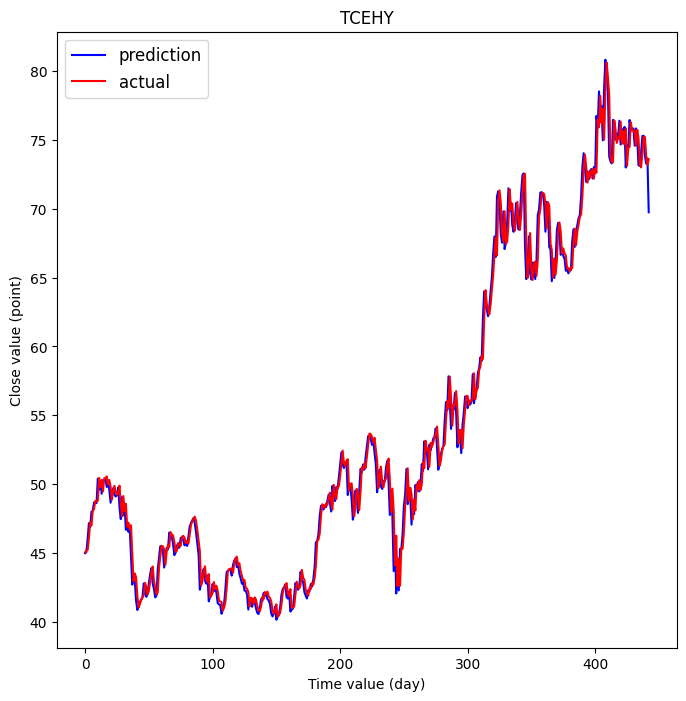

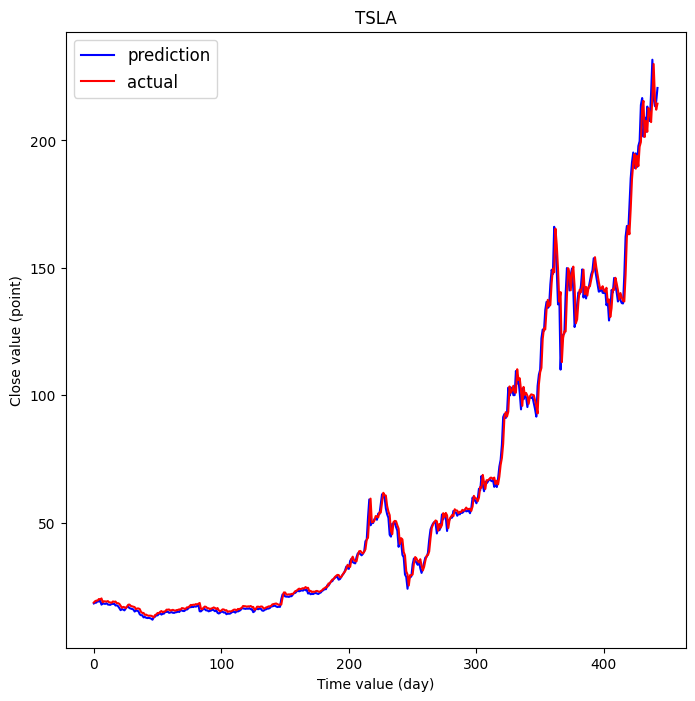

In [48]:
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    plt.figure(figsize=(8,8))
    plt.title("{}".format(i))
    plt.plot(y_true, color = 'b')
    plt.plot(y_pred, color = 'r')
    plt.xlabel("Time value (day)")
    plt.ylabel("Close value (point)")
    plt.legend(('prediction', 'actual'),loc='upper left', fontsize=12)

In [49]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
for i in stockList:
    true = testset[i]["y"].reshape(-1,1)
    pred = model.predict(testset[i]["X"])
    errors = mean_squared_error(true,pred)
    errors2 = mean_squared_error(true, pred, squared=False)
    errors3 = mean_absolute_error(true, pred)
    errors4 = mean_absolute_error(true, pred)*100
# report error
    print('Test errors of ' + i + ":")
    print('mean squared error : %.8f MSE' % (errors))
    print('root mean squared error : %.8f RMSE' % (errors2))
    print('mean absolute error: %.8f MAE' %(errors3))
    print('mean absolute percentage error: %.8f MAPE' %(errors4) + "\n")

14/14 [==============================] - 0s 20ms/step
Test errors of AMZN:
mean squared error : 0.00071099 MSE
root mean squared error : 0.02666436 RMSE
mean absolute error: 0.01811669 MAE
mean absolute percentage error: 1.81166890 MAPE

14/14 [==============================] - 0s 20ms/step
Test errors of NVDA:
mean squared error : 0.00047282 MSE
root mean squared error : 0.02174433 RMSE
mean absolute error: 0.01472441 MAE
mean absolute percentage error: 1.47244064 MAPE

14/14 [==============================] - 0s 20ms/step
Test errors of AAPL:
mean squared error : 0.00048817 MSE
root mean squared error : 0.02209447 RMSE
mean absolute error: 0.01432017 MAE
mean absolute percentage error: 1.43201693 MAPE

14/14 [==============================] - 0s 21ms/step
Test errors of BIDU:
mean squared error : 0.00094190 MSE
root mean squared error : 0.03069033 RMSE
mean absolute error: 0.02048294 MAE
mean absolute percentage error: 2.04829450 MAPE

14/14 [==============================] - 0s 20ms

In [ ]:
df_new1 = {}
for i in stockList:
    df_new1[i] = {}
    df_new1[i]["Test"]  = df_[i].query('Date >= "2019-03-27"').reset_index(drop = False)

In [ ]:
for i in stockList:
  y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
  df_new1[i]["Test"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)
  df_new1[i]["Test"].insert(2,"Predicted", y_pred)

In [ ]:
df_new1[i]["Test"]

In [50]:
for i in stockList:
  # y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
  # y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
  df_pred = pd.DataFrame(data = df_new1[i]["Test"])
  df_pred.to_csv(i + "_output.csv")